# G2M project

### by Gabi Vaisvilaite

**The Project**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market (G2M) strategy they want to understand the market before taking final decision.

**The Goal:**

The outcome is a presentation to XYZ's Executive team. Given the data, present actionable insights to hel XYZ identify the right company to make their investment. This presentation will be judged based on the visuals provided, the quality of analysis and the value of given recommendations and insights. 

**Data:**

Time period of data is from 31/01/2016 to 31/12/2018. There are 4 individual datasets:

- *Cab_Data.csv* – this file includes details of transaction for 2 cab companies

- *Customer_ID.csv* – this is a mapping table that contains a unique identifier which links the customer’s demographic details

- *Transaction_ID.csv* – this is a mapping table that contains transaction to customer mapping and payment mode

- *City.csv* – this file contains list of US cities, their population and number of cab users

## Data description

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cab Data

In [2]:
cab_data = pd.read_csv("Cab_Data.csv")
print("cab_data " + str(cab_data.shape))
cab_data.head()

cab_data (359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


The *cab_data* dataset has 359,392 observations, each having 7 features:
- *Transaction ID* (int) identification number for each ride
- *Date of travel* (int) number corresponding to a date of the ride, to be changed to range (0, 1094), where 0 corresponds to 01/01/2016 and 1094 corresponds to 31/12/2018.
- *Company* (str) cab company with which the ride was taken, either "Pink Cab" or "Yellow Cab"
- *City* (str) city in which the ride was made
- *KM Travelled* (float) number of kilometers travelled per ride 
- *Price Charged* (float) dollars charged per ride
- *Cost of Trip* (float) actual cost of the trip in dollars

In [3]:
cab_data["Date of Travel"]  = cab_data["Date of Travel"] - min(cab_data["Date of Travel"])

### City data

In [4]:
city = pd.read_csv("City.csv")
print("city " + str(city.shape))
city.head()

city (20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


The *city* dataset has 20 observations, each having 3 features:
- *City* (str) city in which the rides are taken
- *Population* (str) population of the city, to be changed to integer
- *Users* (str) number of cab users in the city, to be changed to integer

In [5]:
city["Population"] = city["Population"].apply(lambda x: int(x.replace(',', '')))
city["Users"] = city["Users"].apply(lambda x: int(x.replace(',', '')))

### Customers data

In [6]:
customer_id = pd.read_csv("Customer_ID.csv")
print("customer_id " + str(customer_id.shape))
customer_id.head()

customer_id (49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


The *customer_id* dataset has 49,171 observations, each having 4 features:
- *Customer ID* (int) identification number for each customer
- *Gender* (str) gender of a customer, "Male" or "Female"
- *Age* (int) number corresponding to years of age of a customer
- *Income (USD/Month)* (int) monthly income of a customer in dollars

### Transactions data

In [7]:
transaction_id = pd.read_csv("Transaction_ID.csv")
print("transaction_id " + str(transaction_id.shape))
transaction_id.head()

transaction_id (440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


The *transaction_id* dataset has 440,098 observations, each having 3 features:
- *Transaction ID* (int) identification number for each transaction
- *Customer ID* (int) identification number of a customer of each transaction
- *Payment_Mode* (str) "Card" or "Cash", method in which payment for a ride was made

### Relationships between datasets

The *cab data* dataset is related to *city* dataset through column *City*, to *customer id* dataset through column *Customer ID* and to *transaction id* dataset through column *Transaction ID*. We join all (except for *city* table) together. Further, there are no duplicate ID values and no null values in any of the datasets which allows us to join them cleanly.

In [8]:
df = pd.merge(cab_data, transaction_id, on="Transaction ID")
df = pd.merge(df, customer_id, on="Customer ID")

We also create new variables for this task:
- *Price per KM* equivalent to the price charged divided by the distance covered in each ride.
- *Profit* equivalent to the difference between the price charged for a ride and the cost of a ride.
- *Profit per KM* equivalent to the profit made per 1 kilometer of distance travelled.

In [9]:
df["Price per KM"]  = round(df["Price Charged"]/df["KM Travelled"],3)
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df["Profit per KM"] = df["Profit"]/df["Price per KM"]

In [10]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Price per KM,Profit,Profit per KM
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,12.182,57.3150,4.704892
1,10351127,931,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,22.860,281.2772,12.304339
2,10412921,1056,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,18.615,194.6480,10.456514
3,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,12.527,23.6660,1.889199
4,10320494,840,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,19.821,253.9808,12.813723


## Explanatory Data Analysis

Note that there are 274,681 rides with the Yellow Cab and only 84,711 rides with the Pink Cab, already suggesting that Yellow Cab might be a superior company as they have a larger market share by more than 3 times.

In [11]:
df['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

### Timeline analysis

First, we look into the timeline. We have not been given the exact dates of each transaction, however, given that there are $1095$ distinct integers that we assume correspond to distinct dates and that we have the rough dates of data collection for these datasets, we can deduce that the minimum value correspons to the 1st date the data was collected, and maximum value corresponds to the last day the data was collected, corresponding to 1st of January, 2016 and 31st of December, 2018. Note this argument is based on the fact that $(365+1)+365+365 = 1096$, the $+1$ is there because 2016 was a leap year, which might have been omitted from data collection.

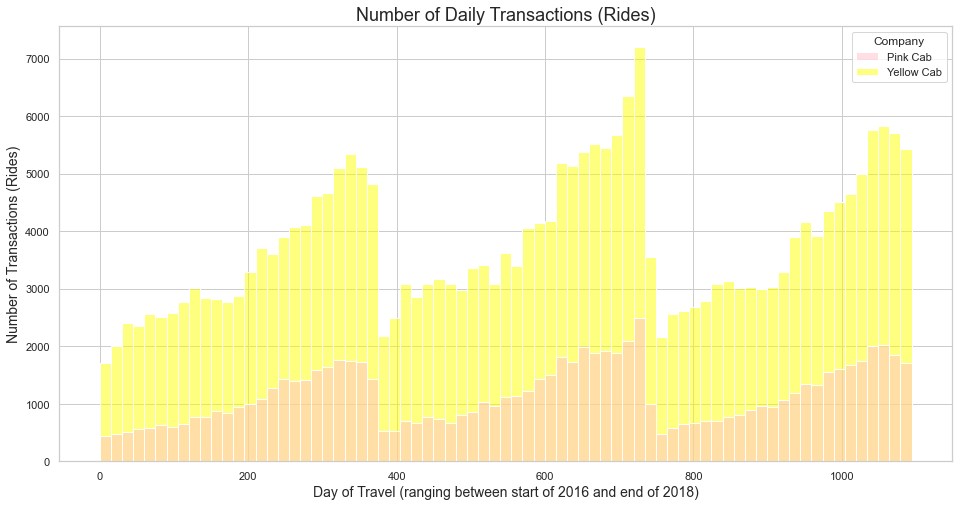

In [12]:
plt.rcParams['figure.figsize'] = [16, 8]
sns.set(style='whitegrid')
color = ['pink','yellow']
ax = sns.histplot(data=df, x="Date of Travel", hue = "Company", palette = color, multiple="layer")
ax.set_title("Number of Daily Transactions (Rides)",fontsize=18)
ax.set_xlabel("Day of Travel (ranging between start of 2016 and end of 2018)",fontsize=14)
ax.set_ylabel("Number of Transactions (Rides)",fontsize=14)
plt.show()

By the plot above and previously made assumptions, we can see that there is some seasonality, the data seems cyclic: the number of rides increase steadily at the begining of each year until it peaks by the end of each year. This could be caused by weather or people behaviour, e.g., after Christmas and New Years and spending money on holidays (including going by cab shopping, going to Christmas parties, taking cabs because of the cold weather and for convenience) people tend to save in January, with each month losening their belts bit by bit and peaking in expenditure on holidays next year again. Obviously, this is just one of possible explanations. Realistically, seems that something is wrong with the data as this does not represent normaly human behaviour, the increase in cab rides would not be that significant and would not suffer such a steep drop every year.

We note in particular, that both companies follow the same pattern of number of daily transactions (rides) with Pink Cab having a significantly smaller part of the transactions every single date the data was collected.

Now we look into the daily profitability for both cab companies.

In [13]:
dfp = df.loc[df["Company"] == "Pink Cab"]
dfy = df.loc[df["Company"] == "Yellow Cab"]
dfpp = dfp.groupby('Date of Travel', as_index=False, sort=False)['Profit'].sum()
dfyp = dfy.groupby('Date of Travel', as_index=False, sort=False)['Profit'].sum()
dfpa = dfp.groupby('Date of Travel', as_index=False, sort=False)['Profit'].mean()
dfya = dfy.groupby('Date of Travel', as_index=False, sort=False)['Profit'].mean()

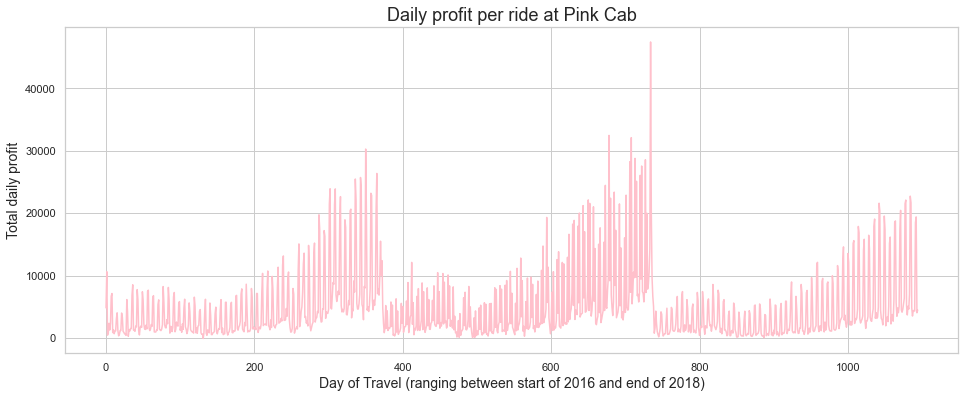

In [14]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='whitegrid')
ax = sns.lineplot(data=dfpp, x="Date of Travel", y="Profit", color = "pink")
ax.set_title("Daily profit per ride at Pink Cab",fontsize=18)
ax.set_xlabel("Day of Travel (ranging between start of 2016 and end of 2018)",fontsize=14)
ax.set_ylabel("Total daily profit",fontsize=14)
plt.show()

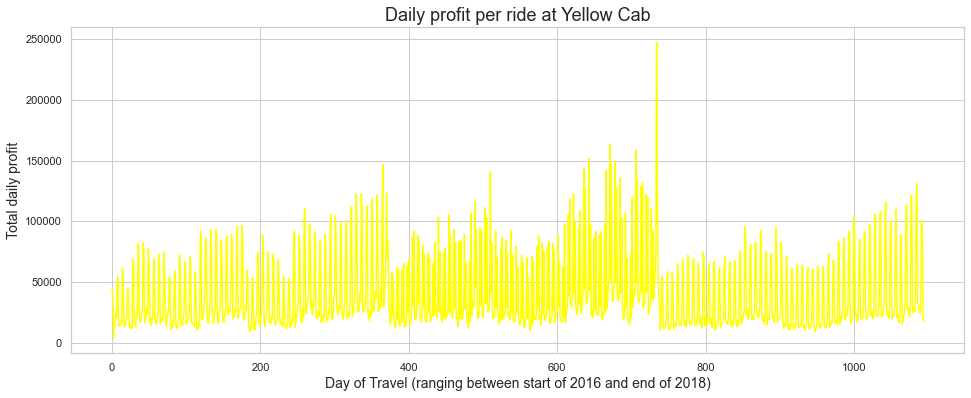

In [15]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='whitegrid')
ax = sns.lineplot(data=dfyp, x="Date of Travel", y="Profit", color = "yellow")
ax.set_title("Daily profit per ride at Yellow Cab",fontsize=18)
ax.set_xlabel("Day of Travel (ranging between start of 2016 and end of 2018)",fontsize=14)
ax.set_ylabel("Total daily profit",fontsize=14)
plt.show()

Total profits of the Pink Cab seem to follow the pattern of the number of daily transactions, that is, the profit is very dependent on the number of rides that day and fluctuates a lot. The profits of the Yellow Cab are less dependent on the number of daily rides and more stable, although the pattern similar to one seen on the number of daily rides plot is still visible. Further, Yellow Cab is significantly more profitable.

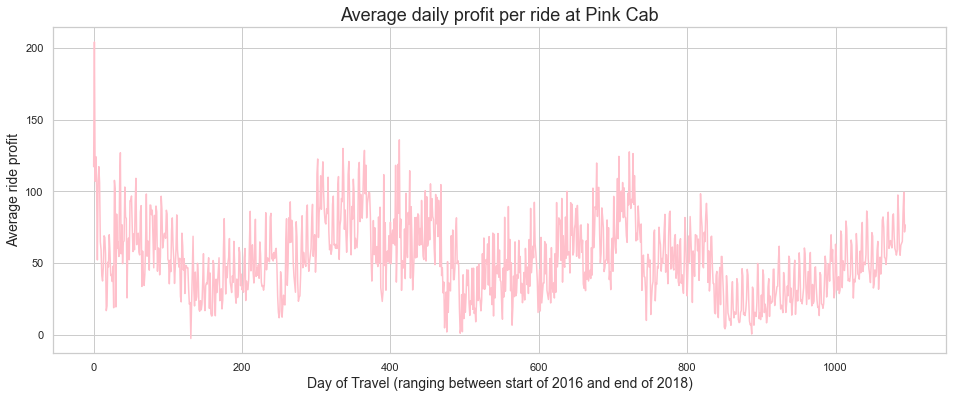

In [16]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='whitegrid')
ax = sns.lineplot(data=dfpa, x="Date of Travel", y="Profit", color = "pink")
ax.set_title("Average daily profit per ride at Pink Cab",fontsize=18)
ax.set_xlabel("Day of Travel (ranging between start of 2016 and end of 2018)",fontsize=14)
ax.set_ylabel("Average ride profit",fontsize=14)
plt.show()

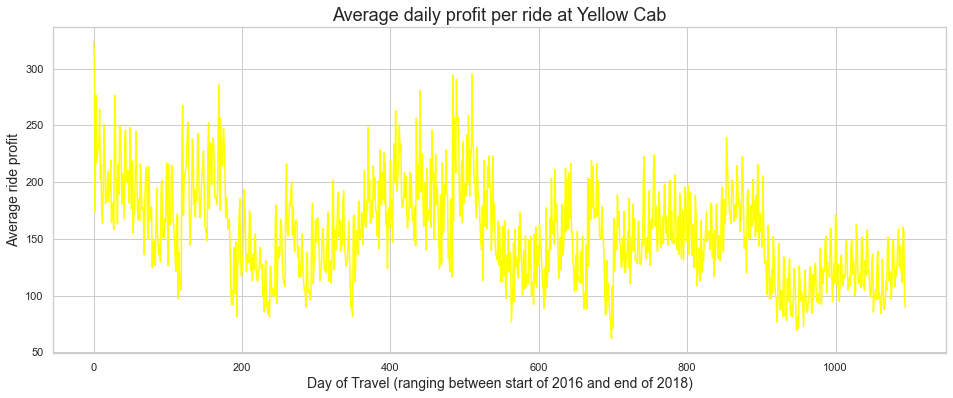

In [17]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='whitegrid')
ax = sns.lineplot(data=dfya, x="Date of Travel", y="Profit", color = "yellow")
ax.set_title("Average daily profit per ride at Yellow Cab",fontsize=18)
ax.set_xlabel("Day of Travel (ranging between start of 2016 and end of 2018)",fontsize=14)
ax.set_ylabel("Average ride profit",fontsize=14)
plt.show()

We can see that the tendencies of average daily profit vary quite a bit daily, Yellow Cab makes greater daily average profits. Importantly, there is no increasing pattern in profits in either of the companies, thus we could not predict an increase in profits later after the investment is made, the profits should be similar as they are now for both companies.

### Location analysis
Now we look into the geographical aspect of the data.

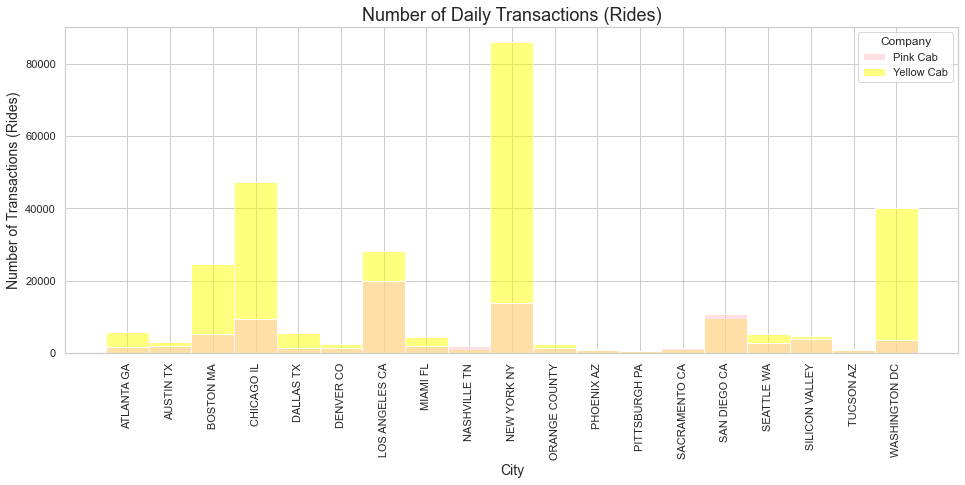

In [18]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='whitegrid')
color = ['pink','yellow']
ax = sns.histplot(data=df, x="City", hue = "Company", palette = color)
ax.set_title("Number of Daily Transactions (Rides)",fontsize=18)
ax.set_xlabel("City",fontsize=14)
ax.set_ylabel("Number of Transactions (Rides)",fontsize=14)
ax.tick_params(axis='x', rotation=90)
plt.show()

The Yellow Cab company dominates the market shared by these two companies, with a much larger market share in most cases. The only places where Pink Cab company has a larger market share than the Yellow Cab company are Sacramento (CA), San Diego (CA) and Nashwille (TN), and even there, the difference in market shares is relatively small.

We will now look into the geographical aspect of the cab companies market by taking a look into the population of cities where the companies operate and the number of cab users.

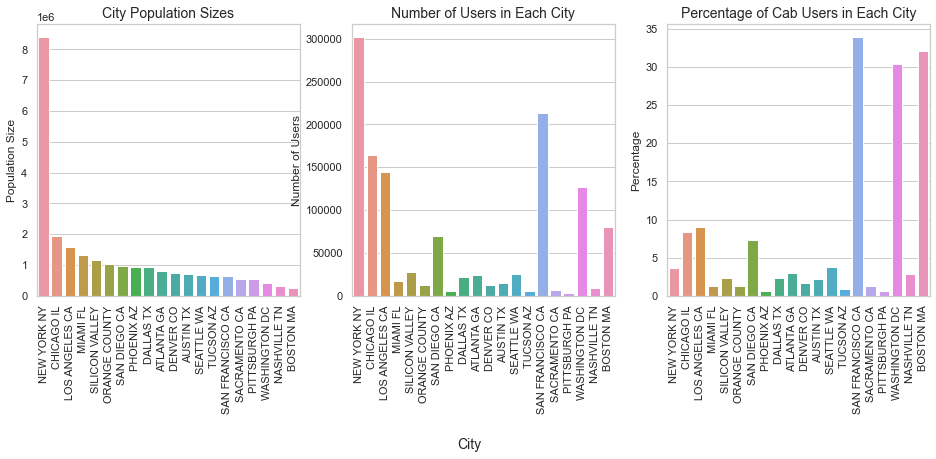

In [19]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.barplot(ax=axes[0], x=city.City, y=city.Population)
axes[0].set_title("City Population Sizes", fontsize = 14)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel("",fontsize=12)
axes[0].set_ylabel("Population Size",fontsize=12)

sns.barplot(ax=axes[1], x=city.City, y=city.Users)
axes[1].set_title("Number of Users in Each City", fontsize=14)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel("",fontsize=12)
axes[1].set_ylabel("Number of Users",fontsize=12)

city["Ratio"] = 100*city["Users"]/city["Population"]
sns.barplot(ax=axes[2], x=city.City, y=city.Ratio)
axes[2].set_title("Percentage of Cab Users in Each City", fontsize=14)
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_xlabel("",fontsize=12)
axes[2].set_ylabel("Percentage",fontsize=12)

fig.text(0.5, -0.3, 'City', ha='center', fontsize = 14)
plt.show()

Above, the leftmost plot shows the population of each city, the middle plot shows the number of cab users in each city, whereas the last plot puts it all together into perspective and shows the percentage of population in each city that are cab users. Important to note that even though only a small part ($4\%$) of the New York population are cab users, they still are a significant part of all cab users in the UK. Cab users are most frequent in San Francisco (CA), Washington (DC) and Boston (MA). Note that none of these cities were of important significance in the previous plot, in fact, in the previous plot San Francisco (CA) is not even displayed. This means that there neither Yellow Cab nor Pink Cab does business in San Francisco (CA), and, also, there are other cab companies that do well and have large market shares of cab users in these cities.

If XYZ where to invest in different locations where the companies operate, we would have to look into San Francisco (CA), as that has a lot of potential and is untouched market by both companies. If we were to invest in Sacramento (CA), San Diego (CA) and/or Nashwille (TN), we look into why the Yellow Cab company is underperforming in those areas and would most likely recommend to invest in the Pink Cab company. However, in any other location (or overall combined), based on location data only, Yellow Cab seems to be a much better option.

Given more data, it would be useful to look into why the location market share varies so much amongst the cities and why neither Pink Cab nor Yellow Cab operate in San Francisco, where the share of the population that are cab users is so large, it has potential to be very profitable to operate there.

### Ride distance and price/cost analysis
Now that we have looked into the location aspect of cab industry, we can look into transaction data, and so we look into the costs, price and length of rides. We create boxplots to compare the performance of Yellow Cab and Pink Cab companies.

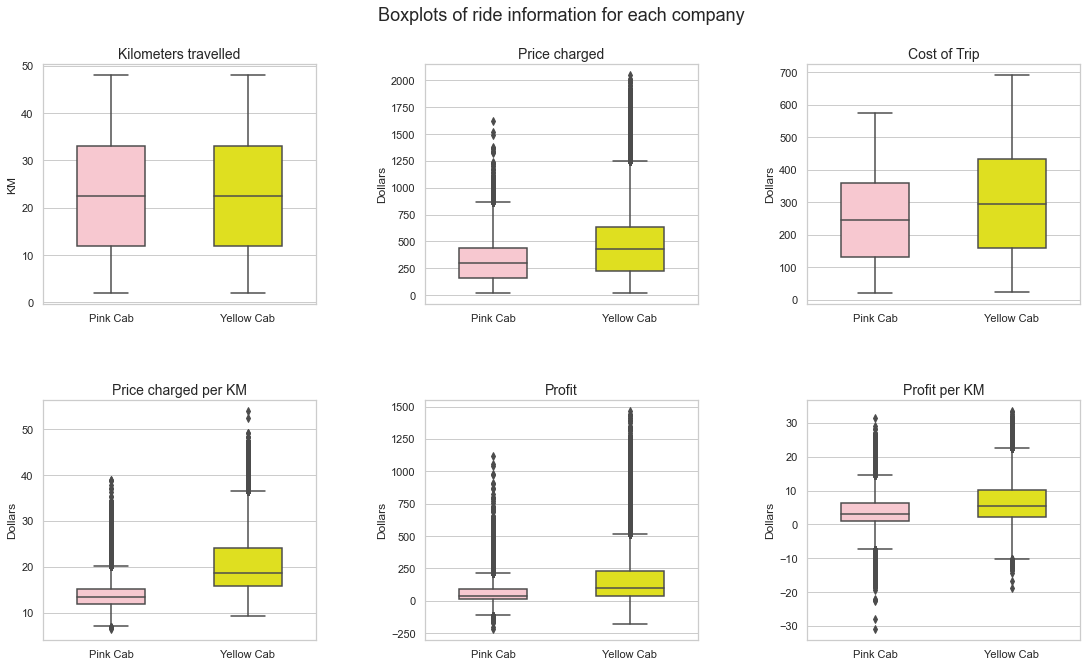

In [20]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle('Boxplots of ride information for each company', fontsize=18)
color = ['pink','yellow']

sns.boxplot(ax=axes[0,0], data=df, x="Company", y="KM Travelled", width=0.5, palette=color)
axes[0,0].set_title("Kilometers travelled", fontsize = 14)
axes[0,0].set_xlabel("",fontsize=12)
axes[0,0].set_ylabel("KM",fontsize=12)

sns.boxplot(ax=axes[0,1], data=df, x="Company", y="Price Charged", width=0.5, palette=color)
axes[0,1].set_title("Price charged", fontsize = 14)
axes[0,1].set_xlabel("",fontsize=12)
axes[0,1].set_ylabel("Dollars",fontsize=12)

sns.boxplot(ax=axes[0,2], data=df, x="Company", y="Cost of Trip", width=0.5, palette=color)
axes[0,2].set_title("Cost of Trip", fontsize = 14)
axes[0,2].set_xlabel("",fontsize=12)
axes[0,2].set_ylabel("Dollars",fontsize=12)

sns.boxplot(ax=axes[1,0], data=df, x="Company", y="Price per KM", width=0.5, palette=color)
axes[1,0].set_title("Price charged per KM", fontsize = 14)
axes[1,0].set_xlabel("",fontsize=12)
axes[1,0].set_ylabel("Dollars",fontsize=12)

sns.boxplot(ax=axes[1,1], data=df, x="Company", y="Profit", width=0.5, palette=color)
axes[1,1].set_title("Profit", fontsize = 14)
axes[1,1].set_xlabel("",fontsize=12)
axes[1,1].set_ylabel("Dollars",fontsize=12)

sns.boxplot(ax=axes[1,2], data=df, x="Company", y="Profit per KM", width=0.5, palette=color)
axes[1,2].set_title("Profit per KM", fontsize = 14)
axes[1,2].set_xlabel("",fontsize=12)
axes[1,2].set_ylabel("Dollars",fontsize=12)

plt.show()

We can see that the distribution of kilometers travelled per each ride (top left plot) is almost exactly the same for both companies. However, the rest of the plots differ significantly. Yellow Cab company tends to charge higher prices than Pink Cab company (top middle plot), however, their trips also cost more (top right plot), although the difference between costs amongst both companies is not as great as the difference between prices. Because of this, price charged per kilometer of the Yellow Cab is greater than that of the Pink Cab company, and, similarly the profit made (both overall and per kilometer) by the Yellow Cab company is greater than the profit made by the Pink Cab company. It is worth noting that the costs and prices vary much more for the Yellow Company (see the size of the box). Also, it could be useful to look into why the costs and prices are so different between the companies, that my shed some more light into the companies and how they operate, to make a better informed decision.

It is valuable to see if there are some differences between the prices, costs and distance of trips amongst different cities. After some investigating (not included to save space), it is clear that the distributions of distance travelled are exactly the same for all cities. The distributions of ride costs differ slightly amongst cities, but overall could be considered more or less the same. The prices charged differ by city quite a bit, with the most significant mention being the New York (NY), where the prices charged are significantly higher than everywhere else, causing the profit and profit per kilometer to be significantly greater than everywhere else as well, see the plots below.

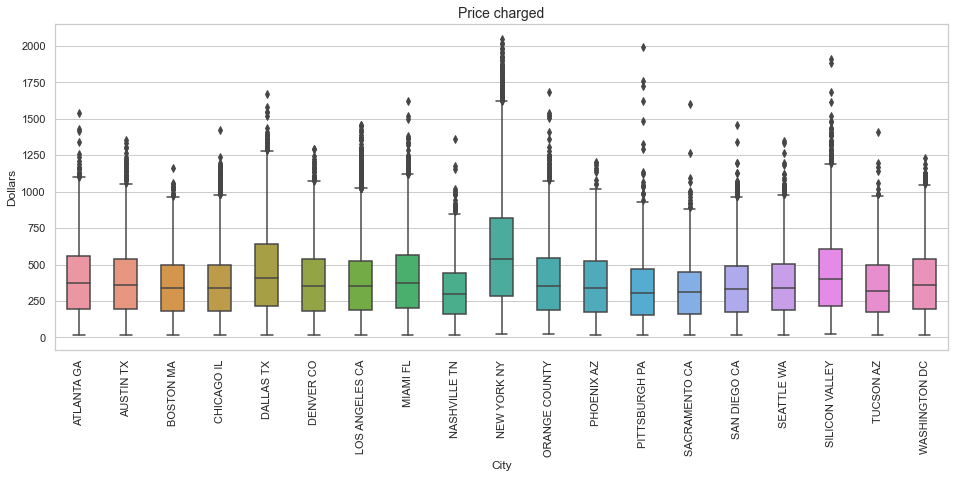

In [21]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='whitegrid')
ax = sns.boxplot(data=df, x="City", y="Price Charged", width=0.5)
ax.set_title("Price charged", fontsize = 14)
ax.set_xlabel("City",fontsize=12)
ax.set_ylabel("Dollars",fontsize=12)
ax.tick_params(axis='x', rotation=90)
plt.show()

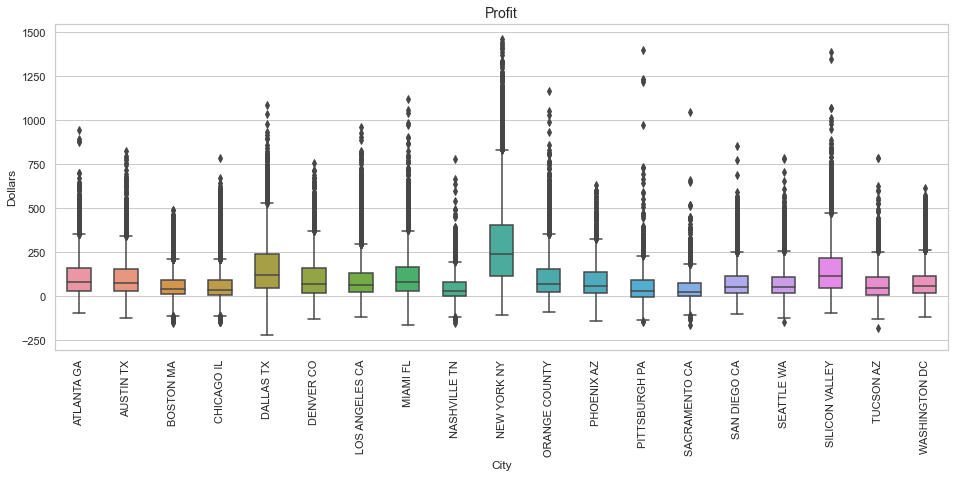

In [22]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='whitegrid')
ax = sns.boxplot(data=df, x="City", y="Profit", width=0.5)
ax.set_title("Profit", fontsize = 14)
ax.set_xlabel("City",fontsize=12)
ax.set_ylabel("Dollars",fontsize=12)
ax.tick_params(axis='x', rotation=90)
plt.show()

We further note that there are quite a lot of cities where almost a quarter of rides do not make any profit and in fact make a loss for the company. See the profit boxplots above, cities like Chicago (IL) and Pittsburgh (PA) have their first quartile (lower part of the box) at zero.

Now we quantify profits made by both companies (rounded to a dollar):

In [23]:
print('Total profit (in dollars) made by the Pink Cab: '+str(int(sum(dfp["Profit"]))))
print('Total profit (in dollars) made by the Yellow Cab: '+str(int(sum(dfy["Profit"]))))
print('Average (per ride) profit (in dollars) made by the Pink Cab: '+str(int(sum(dfp["Profit"])//dfp.shape[0])))
print('Average (per ride) profit (in dollars) made by the Yellow Cab: '+str(int(sum(dfy["Profit"])/dfy.shape[0])))

Total profit (in dollars) made by the Pink Cab: 5307328
Total profit (in dollars) made by the Yellow Cab: 44020373
Average (per ride) profit (in dollars) made by the Pink Cab: 62
Average (per ride) profit (in dollars) made by the Yellow Cab: 160


Clearly, the Yellow Cab makes much more money in total and on average ride compared to the Pink Cab company. We also note that in both cases (Pink Cab and Yellow Cab) there are almost $60\%$ of transactions that are paid for by card, whereas the rest of the transactions are paid by cash.

In [24]:
print("Pink Cab company: percentage of observations of distinct payment modes")
dfp["Payment_Mode"].value_counts()*100/dfp.shape[0]

Pink Cab company: percentage of observations of distinct payment modes


Card    59.87298
Cash    40.12702
Name: Payment_Mode, dtype: float64

In [25]:
print("Yellow Cab company: percentage of observations of distinct payment modes")
dfy["Payment_Mode"].value_counts()*100/dfy.shape[0]

Yellow Cab company: percentage of observations of distinct payment modes


Card    59.991408
Cash    40.008592
Name: Payment_Mode, dtype: float64

### Customer analysis

We note that overall in our dataset there are $57\%$ of male customers, and the rest are women. After looking into the gender distribution between Yellow Cab and Pink Cab companies, we can see that Pink Cab a greater proportion of female customers compared to the Yellow Cab. $42\%$ of Yellow Cab rides had female customers, whereas $44\%$ of Pink Cab rides had female customers. The difference is not very significant but could indicate that more research should be done to understand why that is the case. For example, maybe women feel safer with the Pink Cab company drivers/vehicles, or maybe men tend to pay for the Yellow Cab rides more often than women (in case there are more than one passenger), possibly due to the higher price.

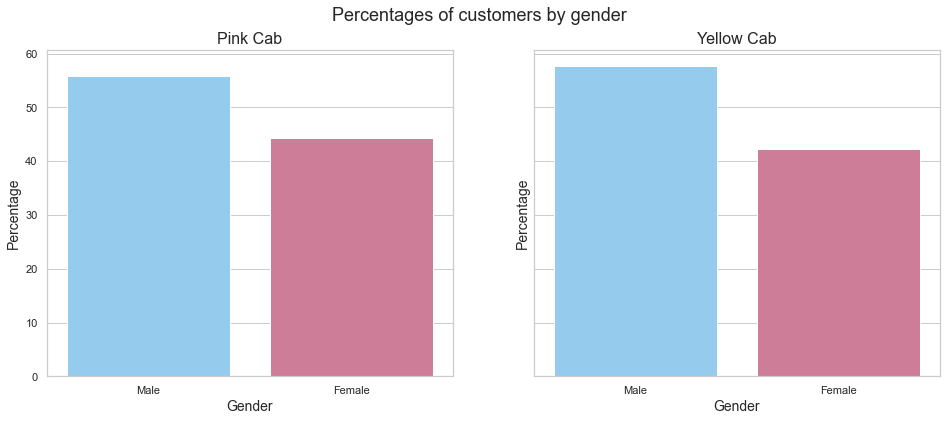

In [26]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Percentages of customers by gender', fontsize=18)
color = ["lightskyblue", "palevioletred"]

sns.barplot(ax=axes[0], x=dfp.Gender.value_counts().index, y=100*dfp.Gender.value_counts()/dfp.shape[0], palette=color)
axes[0].set_title("Pink Cab", fontsize = 16)
axes[0].set_xlabel("Gender",fontsize=14)
axes[0].set_ylabel("Percentage",fontsize=14)

sns.barplot(ax=axes[1], x=dfy.Gender.value_counts().index, y=100*dfy.Gender.value_counts()/dfy.shape[0], palette=color)
axes[1].set_title("Yellow Cab", fontsize = 16)
axes[1].set_xlabel("Gender",fontsize=14)
axes[1].set_ylabel("Percentage",fontsize=14)

plt.show()

We further look into the income and age of the customers of both companies.

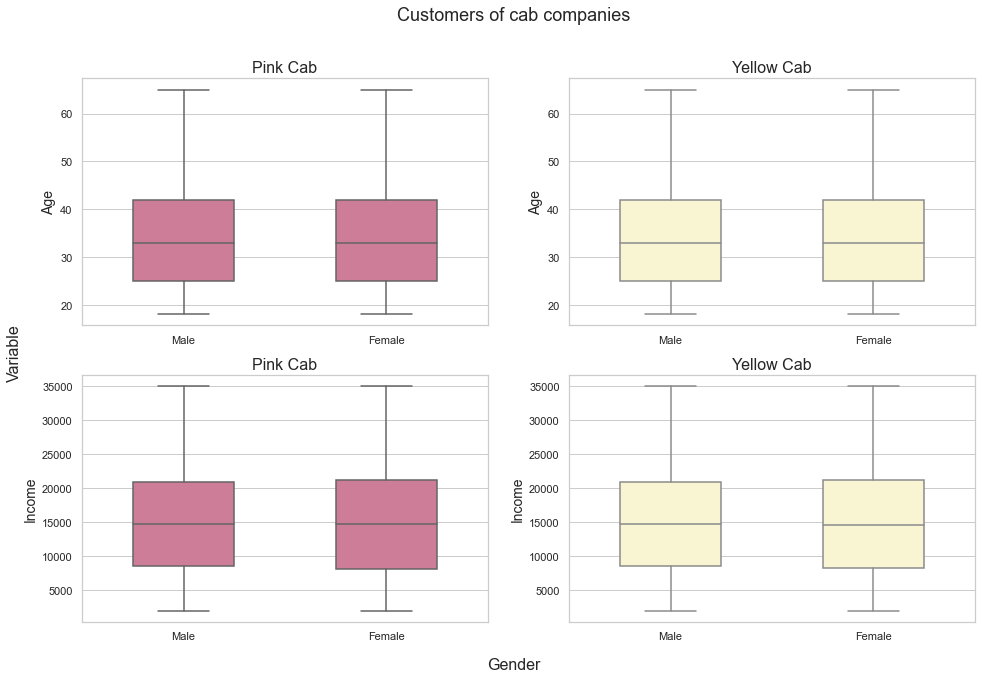

In [27]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Customers of cab companies', fontsize=18)

color = ["palevioletred", "palevioletred"]
sns.boxplot(ax=axes[0,0], x=dfp.Gender, y=dfp["Age"], width=0.5, palette=color)
axes[0,0].set_title("Pink Cab", fontsize = 16)
axes[0,0].set_xlabel("",fontsize=14)
axes[0,0].set_ylabel("Age",fontsize=14)

color = ["lemonchiffon", "lemonchiffon"]
sns.boxplot(ax=axes[0,1], x=dfy.Gender, y=dfy["Age"], width=0.5, palette=color)
axes[0,1].set_title("Yellow Cab", fontsize = 16)
axes[0,1].set_xlabel("",fontsize=14)
axes[0,1].set_ylabel("Age",fontsize=14)

color = ["palevioletred", "palevioletred"]
sns.boxplot(ax=axes[1,0], x=dfp.Gender, y=dfp['Income (USD/Month)'], width=0.5, palette=color)
axes[1,0].set_title("Pink Cab", fontsize = 16)
axes[1,0].set_xlabel("",fontsize=14)
axes[1,0].set_ylabel("Income",fontsize=14)

color = ["lemonchiffon", "lemonchiffon"]
sns.boxplot(ax=axes[1,1], x=dfy.Gender, y=dfy['Income (USD/Month)'], width=0.5, palette=color)
axes[1,1].set_title("Yellow Cab", fontsize = 16)
axes[1,1].set_xlabel("",fontsize=14)
axes[1,1].set_ylabel("Income",fontsize=14)

fig.text(0.5, 0.06, 'Gender', ha='center', fontsize = 16)
fig.text(0.06, 0.5, 'Variable', va='center', rotation='vertical', fontsize = 16)
plt.show()

Clearly, the age or income of both women and men are of the same distributions and they do not vary between thw two companies, suggesting that the target audience of both companies is exactly the same.

## Insights summary
Since the target customers of both companies is exactly the same, the main concerns when deciding to invest are profitability, potential growth, competition and liabilities.

#### Profitability

Taking into account the timeline analysis, we can see that there is clear seasonality in the number of daily transactions in both cases and that is also clearly visible in the profits of the Pink Cab company, whereas profits of the Yellow Cab company are more stable throughout the year. Yellow Cab has more daily transactions (daily rides) and higher profits than the Pink Cab.

Considering the locations data, as we are investing in the company overall, and not cherry picking the locations where the company performs best, the Yellow Cab company mostly and by far performs much better than the Pink Cab company.

Further taking into account the transactions data, Yellow Cab has higher costs per each ride, but also, they charge significantly higher prices compared to he Pink Cab, making Yellow Cab more profitable.

#### Growth and competition

We have to consider other variables that are not in this dataset. There is no potential growth to be deduced from the given data for either one of the companies, which is worrying, as, if another company besides these two is more innovative (e.g. Uber) and growing fast, they might take a greater share of the market and bring these companies to bankrupcy. 

It is worth considering other investment opportunities that show more growth in the recent years as well as more potential to grow next year, which neither of these companies show.

#### Liabilities

From this data we are not able to see any possible liabilities of either of the companies, and we also are unable to predict market changes in case some innovation happens (or a pandemic - note that this data is from pre-pandemic years). However, we have seen that there is a difference in the percentage of female/male customers, which, although unlikely, could suggest misogyny of drivers, and hence, a potentially expensive future lawsuit. 

Also, if we look into the Pink Cab company, we can see that their costs are lower and they also charge less than the Yellow Cab company, which begs the question, why do they not have a larger market share as customers tend to choose the cheaper option. Maybe their cars are old, which poses a risk of malfunction and higher reparation costs and also, are not prefered by customers, but we cannot deduce that from the given data. 

## Recommendation: <font color='yellow'>Yellow Cab</font>

There is a lot of unknown information such as the quality of service, strategies of the companies, other competition, cars information, etc., which makes this decision rather uninformed. The only reliable and useful information we could extract is the profitability and market share of both companies, and. due to time limitations and lack of market research and data about cab markets, we make our decision only based on this data.

If we expect the market to stay the same (in terms of innovation and events such as the pandemic) and the companies to not change their operating strategies significantly, the evidence very strongly supports the investment into Yellow Cab company as opposed to the Pink Cab company.  
